### Дмитриева Анастасия Вячеславовна, БПМ172
### Вариант 10

In [1]:
import numpy as np
import math 
import copy
import matplotlib.pyplot as plt
import scipy.linalg



# Задача 3.1.10

Дана система уравнений $Ax=b$ порядка $n$. Исследовать зависимость погрешности решения x от
погрешностей правой части системы $b$.


Компоненты вектора $b$ во всех вариантах задаются формулой  $b_i  = N , \forall i = 1...n$ , коэффициенты
$c = c_{ij} = 0,1\cdot N \cdot i \cdot j ,    \forall i,j = 1...n, N$ - номер варианта.

$N= 10, n = 5, a_{ij} = \sin{(\frac{c_{ij}}{8})} $

In [2]:
#  1.1 Зададим матрицу системы A и вектор правой части b

N = 10
n = 5
A = np.empty([n, n])
b = np.ones(n)
b = b*N
for i in range(1,n+1):
    for j in range(1,n+1):
        c = 0.1*N*i*j
        A[i-1][j-1] = math.sin(c/8)

print("Матрица A:\n", A)
print("Вектор b", b)

Матрица A:
 [[0.12467473 0.24740396 0.36627253 0.47942554 0.58509727]
 [0.24740396 0.47942554 0.68163876 0.84147098 0.94898462]
 [0.36627253 0.68163876 0.90226759 0.99749499 0.95408578]
 [0.47942554 0.84147098 0.99749499 0.90929743 0.59847214]
 [0.58509727 0.94898462 0.95408578 0.59847214 0.01659189]]
Вектор b [10. 10. 10. 10. 10.]


In [3]:
# 1.2 Найдем решение системы методом Гаусса через встроенную функцию linalg.solve

x = np.linalg.solve(A, b)
x

array([ 1732046.00074125, -2052111.22487528,  1226346.77342854,
        -395911.89200257,    55377.46941042])

In [4]:
# 2. Найдем число обусловленности матрицы с помощью встроенной функции linalg.cond

cond_num =  np.linalg.cond(A)
print("condition number for matrix A:", cond_num)

condition number for matrix A: 5227452.620568788


Найдем вектор относительных погрешностей $d$


$d_i$ = $\frac{||x - x^i||_{\infty}}{||x||_{\infty}}$, где $x^i$ - решение системы $Ax^i$ = $b^i, i = 1,...n$ 

$b_k^i = 
\begin{cases}
 & b_k + \Delta  , k = i \\ 
 & b_k , k \neq i
\end{cases}
$. 

$k = 1,... n$


$\Delta$ - произвольная величина погрешности, возьмем $\Delta = 0.01$

In [5]:
# 3. Найдем вектор относительных погрешностей d

delta = 0.01
def vec_d(A, b): 
    d = np.ones(n)
    for i in range(1,n+1):
        b_i = np.ones(n)
        for j in range(1,n+1):
            if (j == i):
                b_i[j-1] = b[j-1]+delta
            else:
                b_i[j-1] = b[j-1]
        x_i = np.linalg.solve(A, b_i)
        d_i = np.linalg.norm(x-x_i, np.inf)/np.linalg.norm(x, np.inf)
        d[i-1] = d_i
    return d

d = vec_d(A,b)
print("Вектор d: ", d)

Вектор d:  [3.05742164e-03 3.61323516e-03 2.14961419e-03 6.89228637e-04
 9.54279614e-05]


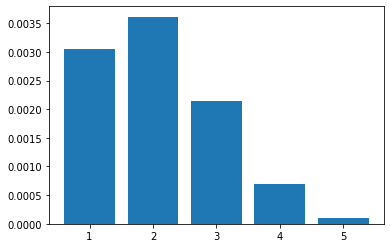

0.0036132351566736938  -  максимальная погрешность у  2 компоненты


In [6]:
# 4. Определить компоненту b_m вектора b, которая оказывает наибольшее влияние на погрешность решения.

x_hist=np.arange(1,n+1) #компонента
y_hist =d #погрешности

plt.bar(x_hist,y_hist)
plt.show()

print(max(d),' -  максимальная погрешность у ',np.where(d==max(d))[0][0]+1,'компоненты')


In [7]:
# Прибавим некоторое значение с (возьмем с=1) к каждой из компонент вектора b 
# оценим норму вектора относительных погрешностей d

lst = []
for i in range(1,n+1):
    b_m = np.ones(n)*N
    b_m[i-1] += 1
    lst.append(np.linalg.norm(vec_d(A, b_m)))

print("Нормы вектора d",lst)
max_value = max(lst)
max_index = lst.index(max_value)
print("Компонента вектора, оказывающая наибольшее влияние на погрешность решения : ",max_index +1)

Нормы вектора d [0.6841274352135371, 0.8075136383486549, 0.4811439382108636, 0.15375782331497434, 0.02240354129532551]
Компонента вектора, оказывающая наибольшее влияние на погрешность решения :  2


Оценить теоретически погрешность решения $x^m$ по формуле:   $\delta(x^m)$ $\leq$ $cond(A)\delta(b^m)$. 

Сравнить значение $\delta(x^m)$ со значением практической погрешности $d_m$

In [9]:
# 5.1 Вычислим x^m - решение системы Ax = b^m

b_m = np.ones(n)
for j in range(1,n+1):
    if (j == i):
        b_m[j-1] = b[j-1]+ delta
    else:
        b_m[j-1] = b[j-1]
x_m = np.linalg.solve(A, b_m)
print("x = ", x_m)

x =  [ 1732214.00597539 -2052307.05366609  1226460.61060296  -395947.21372319
    55382.1549827 ]


In [10]:
# 5.2 Оценить теоретически погрешность решения  

dlt_m = np.linalg.norm(b-b_m, np.inf)/np.linalg.norm(b, np.inf)

print("delta(x^m) <= ",dlt_m * cond_num) 
print("d_m = ", d[max_index])


delta(x^m) <=  5227.452620568677
d_m =  0.0036132351566736938


$ \textbf{Вывод:} $ Значение практической погрешности $d_m$ меньше значения теоретической погрешности $\delta(x^m)$, т.к. теоретическая является оценочной и не вычисляется с должной точностью

# Задача 3.4

Решить систему уравнений $Ax=b$ из задачи 3.1, используя LU-разложение матрицы $A$.

In [11]:
# 1. Используя встроенную функцию scipy.linalg.lu_factor, получить LU- разложение матрицы A

lu, piv = scipy.linalg.lu_factor(A)

In [12]:
# Верхние и нижние треугольные матрицы 

u = np.triu(lu)
l = np.tril(lu, k = -1) + np.eye(n)
print("L:\n",l)
print("U:\n",u)



L:
 [[ 1.          0.          0.          0.          0.        ]
 [ 0.6260028   1.          0.          0.          0.        ]
 [ 0.81939459  0.72943769  1.          0.          0.        ]
 [ 0.21308377  0.51604251 -0.82461458  1.          0.        ]
 [ 0.42284244  0.89246337 -0.88782291  0.85791897  1.        ]]
U:
 [[ 5.85097273e-01  9.48984619e-01  9.54085782e-01  5.98472144e-01
   1.65918922e-02]
 [ 0.00000000e+00  8.75717345e-02  3.05007227e-01  6.22849751e-01
   9.43699211e-01]
 [ 0.00000000e+00  0.00000000e+00 -6.76150710e-03 -3.54174950e-02
  -1.03492939e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.27810452e-03
   9.23111238e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -5.10650143e-05]]


In [13]:
# 2.1 Преобразовать вектор b по формулам прямого хода метода Гаусса. 

b_new = np.linalg.inv(l)@b
print(b_new)


[10.          3.73997203 -0.92202245  5.17886457 -2.82785127]


In [14]:
# 2.2 С помощью обратной подстановки найти решение системы x

x_new = np.linalg.solve(u, b_new)

print("Решение, полученное обратным ходом:\n", x_new)
print("Решение, полученнное в пункте 3.1.10 :\n",x)


Решение, полученное обратным ходом:
 [ 1732046.00074124 -2052111.22487528  1226346.77342854  -395911.89200257
    55377.46941042]
Решение, полученнное в пункте 3.1.10 :
 [ 1732046.00074125 -2052111.22487528  1226346.77342854  -395911.89200257
    55377.46941042]


$ \textbf{Вывод:}$ Решение, полученное LU - разложением матрицы совпадает с решением, полученным в п. 3.1

# Задача 3.6.2

Дана система уравнений $Ax=b$ порядка $n$, где $A=A(t), t$ - параметр. Исследовать зависимость
решения системы $Ax=b$ от вычислительной погрешности при заданных значениях параметра $t$.


Элементы матрицы $A$ вычисляются по формулам :
$A_{ij} = 
\begin{cases}
 & q_M^j  ,  i   \neq j \\ 
 & q_M^j + t , i = j 
\end{cases}
$
где $q_M  = 0.993 + (-1)^M  \cdot M \cdot 10^{-4} , i,j = 1,...n $\
Параметр $t = 0.0001 ,  1  , 10000 $\
Элементы вектора $b$ вычисляются по формулам: $ b_j = q_M^{(n+1-j)}, j = 1,...n$

$  M = 2 , n = 100, m = 5$

In [16]:
# Зададим начальные значения 

M=2
m=5
n=100 
t1=0.0001
t2=1
t3=10000

# Вычислим q по заданной формуле
q=0.993+((-1)**M)*(10**(-4))*M

# Вычислим вектор b по заданной формуле
b=np.zeros(n)
for j in range(1,n+1):
    b[j-1]=q**(n+1-j)

#Вычислим матрицы А для разных значений t
A_1=np.zeros([n,n])
A_2=np.zeros([n,n])
A_3=np.zeros([n,n])
for i in range(100):
    for j in range(100):
        if i!=j:
            A_1[i,j]=q**j
            A_2[i,j]=q**j
            A_3[i,j]=q**j
        else:
            A_1[i,j]=q**j+t1
            A_2[i,j]=q**j+t2
            A_3[i,j]=q**j+t3

In [23]:
# 1.1 Составить программу, реализующую метод Гаусса (схема частичного выбора) для произвольной системы Ax=b. 

def gauss (A,b): 
    M=copy.copy(A) 
    s=copy.copy(b)
    x=np.zeros(n)
    
    #прямой ход
    for j in range(n):
        for i in range(j+1,n):
            mu=M[i,j]/M[j,j] #коэффициент
            M[i]-=M[j]*mu 
            s[i]-=s[j]*mu
            
    #обратный ход        
    x[n-1]=s[n-1]/M[n-1,n-1]
    
    for j in range(n-2,-1,-1):
        l=0
        for i in range(n-1-j):
            l+=(x[n-1-i]*M[j,n-1-i])
        x[j]=(s[j]-l)/M[j,j]
    return(x)


In [24]:
# 1.2 Используя составленную программу, найти решение заданной системы Ax=b.

x_1=gauss(A_1,b)
x_2=gauss(A_2,b)
x_3=gauss(A_3,b)

In [25]:
# 2.1 Составить программу округления числа до m знаков после запятой. 

def round_m(number): 
    number = number*(10**m)+0.41 
    number = number//1 
    return number/(10**m) 


In [26]:
# 2.2 Вычислить элементы матрицы A и вектора b по формулам индивидуального варианта, производя округление 
#до m- знаков после запятой

# Матрицы А с округлением 
A1_1=np.zeros([n,n])
A1_2=np.zeros([n,n])
A1_3=np.zeros([n,n])
for i in range(100):
    for j in range(100):
        if i!=j:
            A1_1[i,j]=round_m(q**j)
            A1_2[i,j]=round_m(q**j)
            A1_3[i,j]=round_m(q**j)
        else:
            A1_1[i,j]=round_m(q**j+t1)
            A1_2[i,j]=round_m(q**j+t2)
            A1_3[i,j]=round_m(q**j+t3)
            
            
# Вектор b с округлением
b1=np.zeros(n)
for j in range(n):
    b1[j]=round_m(q**(n+1-j))

In [27]:
# 3.1 Решить систему уравнений A1x1=b1 методом, указанным в п.1, обращаясь каждый раз к программе округления.

x1_1=gauss(A1_1,b1)
x1_2=gauss(A1_2,b1)
x1_3=gauss(A1_3,b1)



In [28]:
# 3.2 Оценить практически полученную погрешность решения.
# Будем считать погрешности как норму разности между полученными решениями без округления и с округлением 

err1 =np.linalg.norm(x_1-x1_1)
print ('Погрешность1(t1=0.0001) = ', err1)

err2 =np.linalg.norm(x_2-x1_2)
print ('Погрешность2 (t2=1) = ', err2)

err3 =np.linalg.norm(x_3-x1_3)
print ('Погрешность3 (t3=10000) = ', err3)



Погрешность1(t1=0.0001) =  98.12233935820416
Погрешность2 (t2=1) =  0.009953687319850947
Погрешность3 (t3=10000) =  4.9728844068282e-06


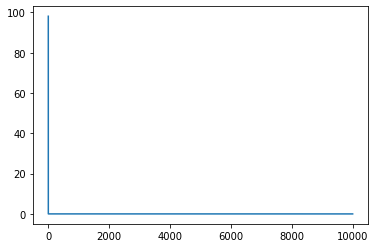

In [29]:
#Сравнить результаты, полученные при разных значениях параметра t

err = [err1, err2, err3]
t = [t1, t2, t3]
plt.plot(t, err)


$ \textbf{Вывод:} $ Чем больше значение величины t, тем меньше значение погрешности.